In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os, sys

In [4]:
import os, sys
home = os.environ['HOME']
git_dir = os.path.join(home, 'git')
sys.path.append(git_dir)  # find tommy lib
import tlib.plot as tpl
import tlib.notebook as tnb
#tpl.test()

In [5]:
df = pd.read_csv('BlackFriday.csv')

***
## Exploratory analysis

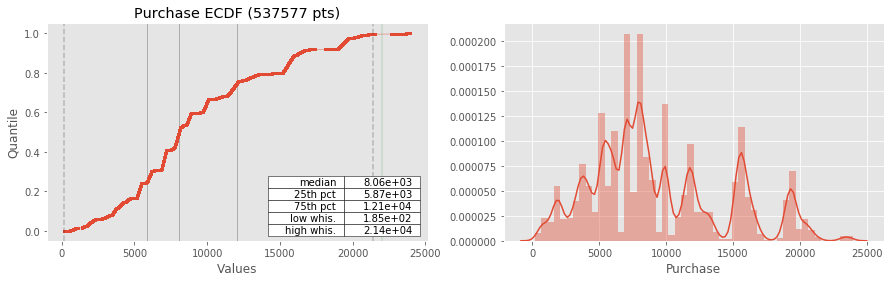

In [14]:
fig, axs = plt.subplots(ncols=2, figsize=(15, 4))
tpl.ECDF(df['Purchase'], title='Purchase ECDF', ax=axs[0]);
axs[0].axvline(22000, color='g', lw=.2)
sns.distplot(df['Purchase'], ax=axs[1]);

- Most people spend in between 6k - 12k.
- A few outliers spend more than 22k.
- Multi-modal (at least four). 
    - Probably follows from price range.
    - If peaks are robust target can be banded.

In [15]:
tnb.missing_values(df)

<span style='color:None'>**Missing values in**:<br>`Product_Category_2` (31.06%, 166986 entries)<br>`Product_Category_3` (69.44%, 373299 entries)<br></span>

If `NaN` in a product category does that mean that customer bought less than three items?

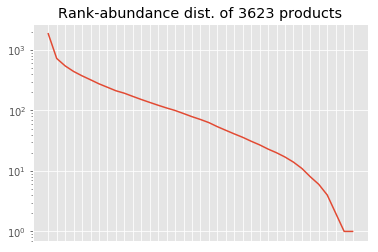

In [17]:
prod_count = df.Product_ID.value_counts()

plt.plot(prod_count[::100]);
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
# plt.xscale('log')
plt.yscale('log')
plt.title('Rank-abundance dist. of {:.0f} products'.format(df['Product_ID'].nunique()));

In [18]:
df['User_ID'].nunique()

5891

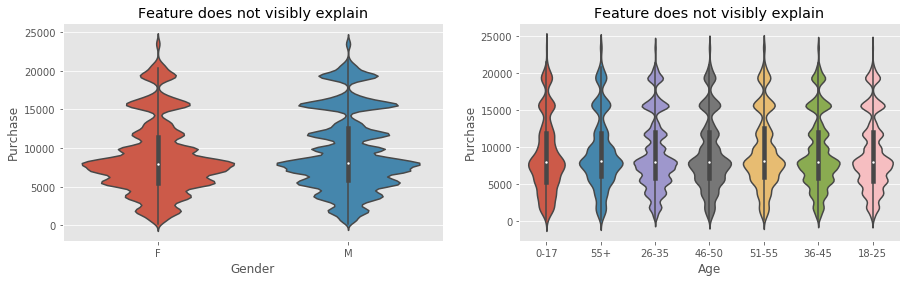

In [6]:
# keys = df.keys()
keys = ['Gender', 'Age']
fig, axs = plt.subplots(ncols=len(keys), figsize=(15, 4))
assert len(axs.flatten()) == len(keys)
for ax, key in zip(axs.flatten(), keys):
    sns.violinplot(data=df, y='Purchase', x=key, ax=ax, sharey=True);
    ax.set_title('Feature does not visibly explain')
#     sns.boxplot(data=df, y='Purchase', x=key, ax=ax);

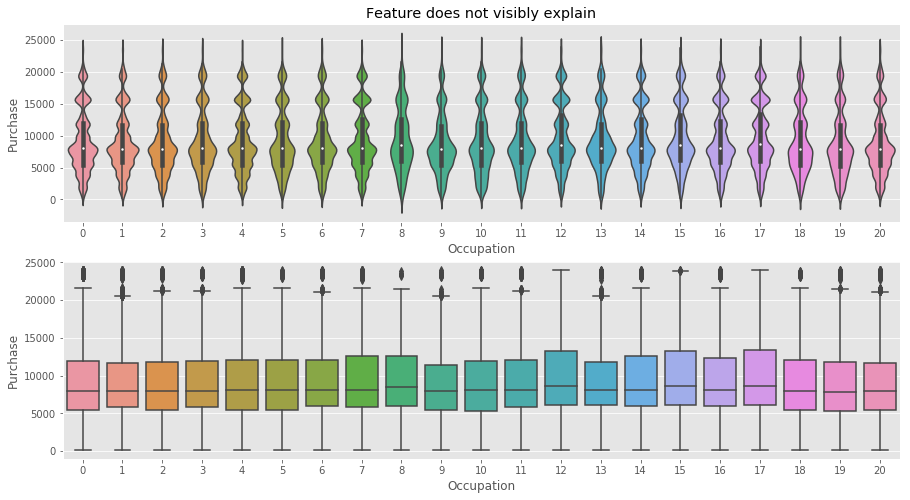

In [7]:
fig, axs = plt.subplots(ncols=1, nrows=2, figsize=(15,8))
sns.violinplot(data=df, y='Purchase', x='Occupation', ax=axs[0]);
axs[0].set_title('Feature does not visibly explain')
sns.boxplot(data=df, y='Purchase', x='Occupation', ax=axs[1]);

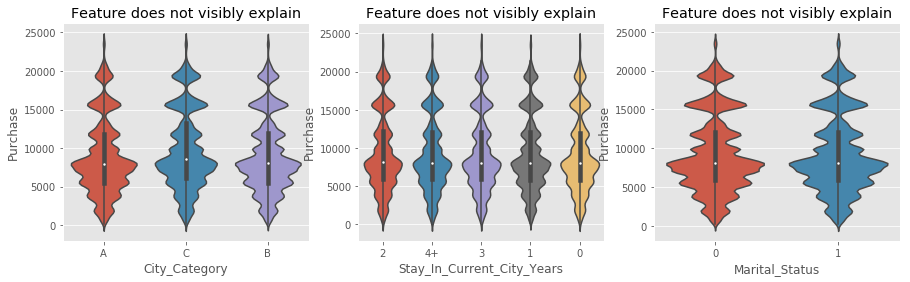

In [8]:
# keys = df.keys()
keys = ['City_Category', 'Stay_In_Current_City_Years', 'Marital_Status']
fig, axs = plt.subplots(ncols=len(keys), figsize=(15, 4))
assert len(axs.flatten()) == len(keys)
for ax, key in zip(axs.flatten(), keys):
    sns.violinplot(data=df, y='Purchase', x=key, ax=ax, sharey=True);   
    ax.set_title('Feature does not visibly explain')
#     sns.boxplot(data=df, y='Purchase', x=key, ax=ax);

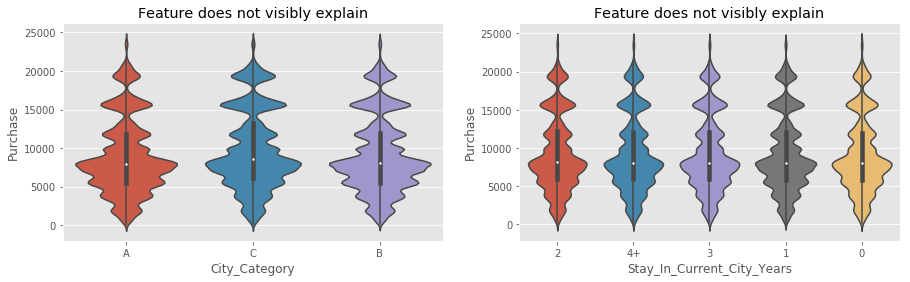

In [9]:
# keys = df.keys()
keys = ['City_Category', 'Stay_In_Current_City_Years']
fig, axs = plt.subplots(ncols=len(keys), figsize=(15, 4))
assert len(axs.flatten()) == len(keys)
for ax, key in zip(axs.flatten(), keys):
    sns.violinplot(data=df, y='Purchase', x=key, ax=ax, sharey=True);
    ax.set_title('Feature does not visibly explain')
#     sns.boxplot(data=df, y='Purchase', x=key, ax=ax);

In [11]:
df['Product_Category_1'].nunique(), df['Product_Category_2'].nunique(), df['Product_Category_3'].nunique()

(18, 17, 15)

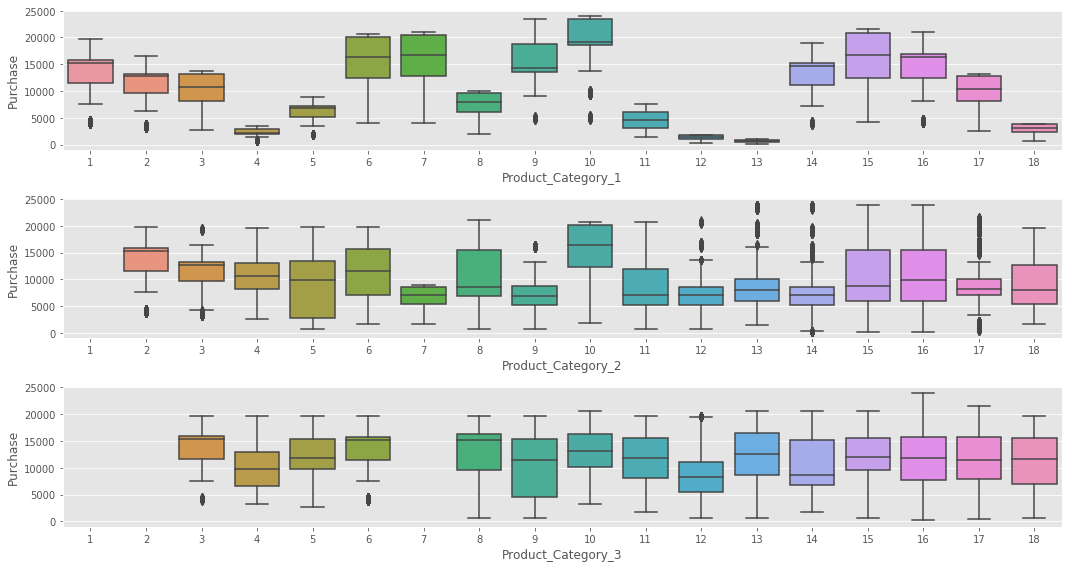

In [17]:
fig, axs = plt.subplots(ncols=1, nrows=3, figsize=(15,8))
# sns.violinplot(data=df, y='Purchase', x='Product_Category_1', ax=axs[0]);
sns.boxplot(data=df, y='Purchase', x='Product_Category_1', ax=axs[0], order=range(1, 18+1));
sns.boxplot(data=df, y='Purchase', x='Product_Category_2', ax=axs[1], order=range(1, 18+1));
sns.boxplot(data=df, y='Purchase', x='Product_Category_3', ax=axs[2], order=range(1, 18+1));
fig.tight_layout()

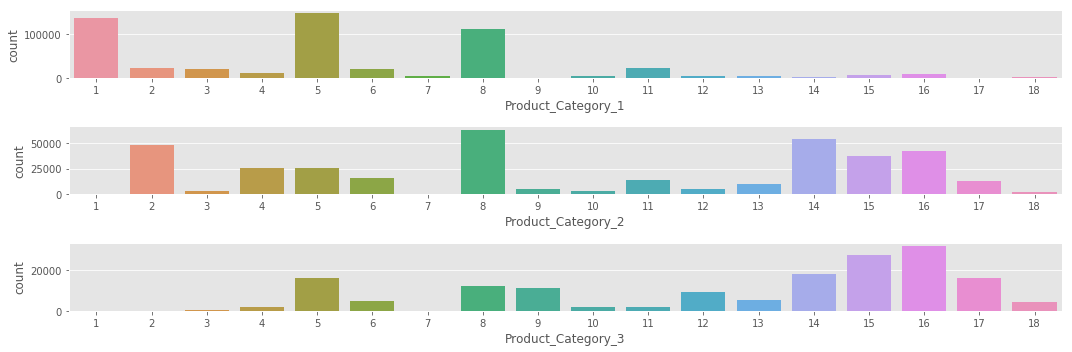

In [31]:
fig, axs = plt.subplots(nrows=3, figsize=(15,5))
sns.countplot(data=df, x='Product_Category_1', order=range(1,18+1), ax=axs[0])
sns.countplot(data=df, x='Product_Category_2', order=range(1,18+1), ax=axs[1])
sns.countplot(data=df, x='Product_Category_3', order=range(1,18+1), ax=axs[2])
fig.tight_layout();

- `Product_Category_1` best explain target variance.
- Who bought product 1 did not buy anything else

In [13]:
df.corr()

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
Occupation,1.000000,0.024691,-0.008114,-0.000031,0.013452,0.021104
Marital_Status,0.024691,1.000000,0.020546,0.015116,0.019452,0.000129
Product_Category_1,-0.008114,0.020546,1.000000,0.540423,0.229490,-0.314125
Product_Category_2,-0.000031,0.015116,0.540423,1.000000,0.543544,-0.209973
Product_Category_3,0.013452,0.019452,0.229490,0.543544,1.000000,-0.022257
Purchase,0.021104,0.000129,-0.314125,-0.209973,-0.022257,1.000000


- Target distribution (and related marginals) approximately tri-modal.
- `Product_Category_1` feature that best explain target.
- A few outliers with high target.
- Single features do not explain target variation much.
- Missing data increasing in product category. Maybe they haven't bought?

In [14]:
prod1_vals = df.Product_Category_1.unique()
prod2_vals = df.Product_Category_2.unique()
prod3_vals = df.Product_Category_3.unique()

In [15]:
np.sort(prod1_vals), np.sort(prod2_vals), np.sort(prod3_vals)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18]),
 array([ 2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14.,
        15., 16., 17., 18., nan]),
 array([ 3.,  4.,  5.,  6.,  8.,  9., 10., 11., 12., 13., 14., 15., 16.,
        17., 18., nan]))

Product categories: values 1 and 2 are not present in 3. Maybe they are rare?

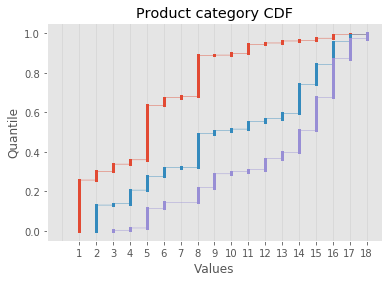

In [16]:
ax = plt.gca()
kwargs = {'with_table':False, 'with_whiskers':False, 'with_stat':False, 'ax':ax}
[ax.axvline(n, alpha=.1, color='k', lw=.5) for n in range(18+1)]
tpl.ECDF(df.Product_Category_1.values, **kwargs)
tpl.ECDF(df.Product_Category_2.dropna().values, **kwargs)
tpl.ECDF(df.Product_Category_3.dropna().values, **kwargs)
ax.set_title('Product category CDF')
ax.set_xticks(range(1,18+1));

- Categories 1, 5 and 8 very quite common for product category 1.
- 5 and 8 also common in product category 2 and 3.
- Late product categories are common in product category 2 and 3, early are common in product category 1.
- Category 1 missing from Prod cat 2, categories 1 and 2 missing from product category 3.

- 3 peaks in distribution related to 3 product categories?
- 3 product categories means bought more? means correlates with target regardless of category

Feature engineering: number of items bought

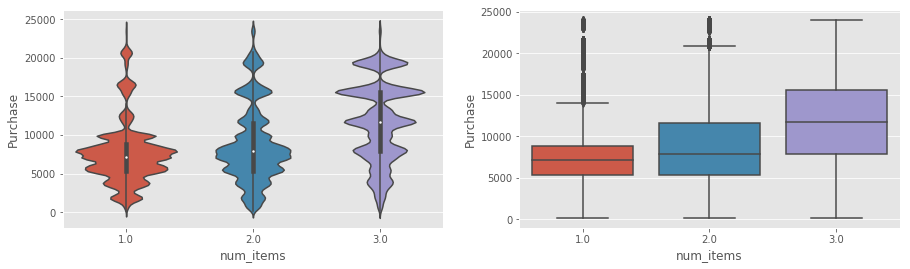

In [17]:
df['prod_cat_2'] = ~df.Product_Category_2.isna()
df['prod_cat_3'] = ~df.Product_Category_3.isna()
assert len(df[(~ df.prod_cat_2) & (df.prod_cat_3)]) == 0  # no prod-cat_3 w/o prod_cat_2
df.loc[~df.prod_cat_2 & ~df.prod_cat_3, 'num_items'] = 1
df.loc[df.prod_cat_2 & ~df.prod_cat_3, 'num_items'] = 2
df.loc[df.prod_cat_2 & df.prod_cat_3, 'num_items'] = 3
fig, axs = plt.subplots(ncols=2, figsize=(15, 4))
sns.violinplot(data=df, x='num_items', y='Purchase', ax=axs[0]);
sns.boxplot(data=df, x='num_items', y='Purchase', ax=axs[1]);

****
## Encoding

In [18]:
import bf_lib

In [21]:
df = bf_lib.encode_features(df)
df = bf_lib.normalize_features(df)

***
## Models

Ideas: 
- bin outliers or peraks and train decision tree to find most relevant feature to find it.
- group by user ID and follow identical users


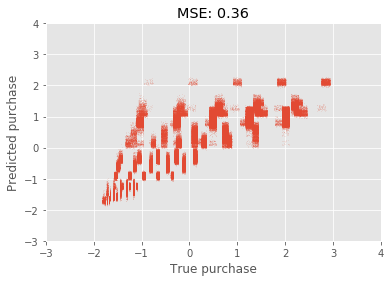

In [159]:
import sklearn.linear_model as sklm
import sklearn.metrics as skme
lr = sklm.LinearRegression()
lr.fit(X, ys)
y_pred = lr.predict(X)
mse = skme.mean_squared_error(ys, y_pred)
plt.plot(ys.flatten(), y_pred.flatten(), ',', alpha=.1)
plt.xlim(-3, 4)
plt.ylim(-3, 4)
plt.xlabel('True purchase')
plt.ylabel('Predicted purchase')
plt.title('MSE: {:.2f}'.format(mse));

In [160]:
import statsmodels.regression as smre

In [164]:
res = smre.linear_model.OLS(endog=ys, exog=X).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                 1.268e+04
Date:                Wed, 02 Jan 2019   Prob (F-statistic):               0.00
Time:                        12:14:51   Log-Likelihood:            -4.8901e+05
No. Observations:              537577   AIC:                         9.782e+05
Df Residuals:                  537501   BIC:                         9.790e+05
Df Model:                          75                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0061      0.002     -3.495      0.000      -0.009      -0.003
x2            -0.0114      0.002     -5.690      0.000      -0.015      -0.007
x3             0.0207      0.004      5.124      0.000       0.013       0.029
x4             0.0123      0.004      2.819      0.005       0.004       0.021
x5             0.0281      0.005      5.611      0.000       0.018       0.038
x6             0.0686      0.006     12.126      0.000       0.057       0.080
x7             0.0437      0.004     10.620      0.000       0.036       0.052
x8             0.0296      0.006      4.595      0.000       0.017       0.042
x9             0.0690      0.005     12.697      0.000       0.058       0.080
x10            0.0437      0.004     10.457      0.000       0.036       0.052
x11           -0.0301      0.016     -1.905      0.057      -0.061       0.001
x12            0.0409      0.008      4.822      0.000       0.024       0.057
x13            0.0423      0.007      6.455      0.000       0.029       0.055
x14            0.0425      0.007      6.477      0.000       0.030       0.055
x15            0.0752      0.005     15.645      0.000       0.066       0.085
x16            0.0492      0.008      6.248      0.000       0.034       0.065
x17            0.0558      0.005     11.258      0.000       0.046       0.066
x18            0.0925      0.006     14.326      0.000       0.080       0.105
x19            0.0476      0.005      9.348      0.000       0.038       0.058
x20            0.0578      0.005     12.729      0.000       0.049       0.067
x21            0.0170      0.008      2.078      0.038       0.001       0.033
x22           -0.0420      0.007     -5.670      0.000      -0.056      -0.027
x23           -0.1112      0.002    -50.391      0.000      -0.115      -0.107
x24           -0.0827      0.002    -42.132      0.000      -0.087      -0.079
x25            0.6793      0.003    196.770      0.000       0.673       0.686
x26            0.3302      0.005     60.162      0.000       0.319       0.341
x27            0.2381      0.007     31.850      0.000       0.223       0.253
x28           -1.5140      0.007   -218.180      0.000      -1.528      -1.500
x29           -0.7807      0.003   -249.948      0.000      -0.787      -0.775
x30            1.1087      0.005    205.215      0.000       1.098       1.119
x31            1.2741      0.010    129.582      0.000       1.255       1.293
x32           -0.5261      0.003   -163.122      0.000      -0.532      -0.520
x33            1.1255      0.029     39.321      0.000       1.069       1.182
x34            1.9356      0.009    220.679      0.000       1.918       1.953
x35           -1.0718      0.005   -234.446      0.000      -1.081      -1.063
x36           -1.7577      0.010   -182.428      0.000      -1.777      -1.739
x3

In [167]:
res.get_influence()